# 10 minutes to Koalas

This is a short introduction to Koalas, geared mainly for new users. This notebook shows you some key differences between pandas and Koalas.

Customarily, we import Koalas as follows:

In [1]:
>>> import pandas as pd
>>> import numpy as np
>>> import databricks.koalas as ks
>>> from pyspark.sql import SparkSession

## Object Creation



Creating a Koalas Series by passing a list of values, letting Koalas create a default integer index:

In [2]:
>>> s = ks.Series([1, 3, 5, np.nan, 6, 8])

In [3]:
>>> s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
Name: 0, dtype: float64

Creating a Koalas DataFrame by passing a dict of objects that can be converted to series-like.

In [4]:
>>> kdf = ks.DataFrame(
...     {'a': [1, 2, 3, 4, 5, 6],
...      'b': [100, 200, 300, 400, 500, 600],
...      'c': ["one", "two", "three", "four", "five", "six"]},
...     index=[10, 20, 30, 40, 50, 60])

In [5]:
>>> kdf

,a,b,c
10,1,100,one
20,2,200,two
30,3,300,three
40,4,400,four
50,5,500,five
60,6,600,six


Creating a pandas DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [6]:
>>> dates = pd.date_range('20130101', periods=6)

In [7]:
>>> dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
>>> pdf = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [9]:
>>> pdf

,A,B,C,D
2013-01-01,0.523653,1.094083,-1.085216,-0.277817
2013-01-02,-0.818953,-1.590651,1.447248,0.557978
2013-01-03,-0.639622,-0.462579,0.618962,-1.077554
2013-01-04,1.014251,-0.210832,0.700963,1.040716
2013-01-05,0.398698,1.714491,1.022288,-1.247547
2013-01-06,-0.958220,-1.142780,-1.060538,-1.594178


Now, this pandas DataFrame can be converted to a Koalas DataFrame

In [10]:
>>> kdf = ks.from_pandas(pdf)

In [11]:
>>> type(kdf)

databricks.koalas.frame.DataFrame

It looks and behaves the same as a pandas DataFrame though

In [12]:
>>> kdf

,A,B,C,D
2013-01-01,0.523653,1.094083,-1.085216,-0.277817
2013-01-02,-0.818953,-1.590651,1.447248,0.557978
2013-01-03,-0.639622,-0.462579,0.618962,-1.077554
2013-01-04,1.014251,-0.210832,0.700963,1.040716
2013-01-05,0.398698,1.714491,1.022288,-1.247547
2013-01-06,-0.958220,-1.142780,-1.060538,-1.594178


Also, it is possible to create a Koalas DataFrame from Spark DataFrame.  

Creating a Spark DataFrame from pandas DataFrame

In [13]:
>>> spark = SparkSession.builder.getOrCreate()

In [14]:
>>> sdf = spark.createDataFrame(pdf)

In [15]:
>>> sdf.show()

+-------------------+--------------------+-------------------+--------------------+
|                  A|                   B|                  C|                   D|
+-------------------+--------------------+-------------------+--------------------+
| 0.5236525618187172|  1.0940829233503602|-1.0852160644331992|-0.27781691500847233|
|-0.8189529425349316| -1.5906505008343652| 1.4472483648932366|  0.5579782954288472|
|-0.6396221259244098|-0.46257886109604085| 0.6189618561744713| -1.0775539055564407|
|  1.014251484934751|-0.21083228083596156|   0.70096294145404|  1.0407160536854274|
| 0.3986975272383961|  1.7144914902602355| 1.0222881006236402|  -1.247546789552812|
|-0.9582199029104204| -1.1427797594347964|-1.0605376058532965| -1.5941777150287884|
+-------------------+--------------------+-------------------+--------------------+



Creating Koalas DataFrame from Spark DataFrame.
`to_koalas()` is automatically attached to Spark DataFrame and available as an API when Koalas is imported.

In [16]:
>>> kdf = sdf.to_koalas()

In [17]:
>>> kdf

,A,B,C,D
0,0.523653,1.094083,-1.085216,-0.277817
1,-0.818953,-1.590651,1.447248,0.557978
2,-0.639622,-0.462579,0.618962,-1.077554
3,1.014251,-0.210832,0.700963,1.040716
4,0.398698,1.714491,1.022288,-1.247547
5,-0.958220,-1.142780,-1.060538,-1.594178


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes) . Types that are common to both Spark and pandas are currently supported.

In [18]:
>>> kdf.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

## Viewing Data

See the [API Reference](https://koalas.readthedocs.io/en/latest/reference/index.html).

See the top rows of the frame. The results may not be the same as pandas though: unlike pandas, the data in a Spark dataframe is not _ordered_, it has no intrinsic notion of index. When asked for the head of a dataframe, Spark will just take the requested number of rows from a partition. Do not rely on it to return specific rows, use `.loc` or `iloc` instead.

In [19]:
>>> kdf.head()

,A,B,C,D
0,0.523653,1.094083,-1.085216,-0.277817
1,-0.818953,-1.590651,1.447248,0.557978
2,-0.639622,-0.462579,0.618962,-1.077554
3,1.014251,-0.210832,0.700963,1.040716
4,0.398698,1.714491,1.022288,-1.247547


Display the index, columns, and the underlying numpy data.

You can also retrieve the index; the index column can be ascribed to a DataFrame, see later

In [20]:
>>> kdf.index

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [21]:
>>> kdf.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [22]:
>>> kdf.to_numpy()

array([[ 0.52365256,  1.09408292, -1.08521606, -0.27781692],
       [-0.81895294, -1.5906505 ,  1.44724836,  0.5579783 ],
       [-0.63962213, -0.46257886,  0.61896186, -1.07755391],
       [ 1.01425148, -0.21083228,  0.70096294,  1.04071605],
       [ 0.39869753,  1.71449149,  1.0222881 , -1.24754679],
       [-0.9582199 , -1.14277976, -1.06053761, -1.59417772]])

Describe shows a quick statistic summary of your data

In [23]:
>>> kdf.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.080032,-0.099711,0.273951,-0.433067
std,0.827216,1.278389,1.083162,1.058794
min,-0.958220,-1.590651,-1.085216,-1.594178
25%,-0.818953,-1.142780,-1.060538,-1.247547
50%,-0.639622,-0.462579,0.618962,-1.077554
75%,0.523653,1.094083,1.022288,0.557978
max,1.014251,1.714491,1.447248,1.040716


Transposing your data

In [24]:
>>> kdf.T

,0,1,2,3,4,5
A,0.523653,-0.818953,-0.639622,1.014251,0.398698,-0.958220
B,1.094083,-1.590651,-0.462579,-0.210832,1.714491,-1.142780
C,-1.085216,1.447248,0.618962,0.700963,1.022288,-1.060538
D,-0.277817,0.557978,-1.077554,1.040716,-1.247547,-1.594178


Sorting by its index

In [25]:
>>> kdf.sort_index(ascending=False)

,A,B,C,D
5,-0.958220,-1.142780,-1.060538,-1.594178
4,0.398698,1.714491,1.022288,-1.247547
3,1.014251,-0.210832,0.700963,1.040716
2,-0.639622,-0.462579,0.618962,-1.077554
1,-0.818953,-1.590651,1.447248,0.557978
0,0.523653,1.094083,-1.085216,-0.277817


Sorting by value

In [26]:
>>> kdf.sort_values(by='B')

,A,B,C,D
1,-0.818953,-1.590651,1.447248,0.557978
5,-0.958220,-1.142780,-1.060538,-1.594178
2,-0.639622,-0.462579,0.618962,-1.077554
3,1.014251,-0.210832,0.700963,1.040716
0,0.523653,1.094083,-1.085216,-0.277817
4,0.398698,1.714491,1.022288,-1.247547


## Missing Data
Koalas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations. 


In [27]:
>>> pdf1 = pdf.reindex(index=dates[0:4], columns=list(pdf.columns) + ['E'])

In [28]:
>>> pdf1.loc[dates[0]:dates[1], 'E'] = 1

In [29]:
>>> kdf1 = ks.from_pandas(pdf1)

In [30]:
>>> kdf1

,A,B,C,D,E
2013-01-01,0.523653,1.094083,-1.085216,-0.277817,1.0
2013-01-02,-0.818953,-1.590651,1.447248,0.557978,1.0
2013-01-03,-0.639622,-0.462579,0.618962,-1.077554,NaN
2013-01-04,1.014251,-0.210832,0.700963,1.040716,NaN


To drop any rows that have missing data.

In [31]:
>>> kdf1.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.523653,1.094083,-1.085216,-0.277817,1.0
2013-01-02,-0.818953,-1.590651,1.447248,0.557978,1.0


Filling missing data.

In [32]:
>>> kdf1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.523653,1.094083,-1.085216,-0.277817,1.0
2013-01-02,-0.818953,-1.590651,1.447248,0.557978,1.0
2013-01-03,-0.639622,-0.462579,0.618962,-1.077554,5.0
2013-01-04,1.014251,-0.210832,0.700963,1.040716,5.0


## Operations

### Stats
Operations in general exclude missing data.

Performing a descriptive statistic:

In [33]:
>>> kdf.mean()

A   -0.080032
B   -0.099711
C    0.273951
D   -0.433067
dtype: float64

### Spark Configurations

Various configurations in PySpark could be applied internally in Koalas.
For example, you can enable Arrow optimization to hugely speed up internal pandas conversion. See <a href="https://spark.apache.org/docs/latest/sql-pyspark-pandas-with-arrow.html">PySpark Usage Guide for Pandas with Apache Arrow</a>.

In [34]:
>>> prev = spark.conf.get("spark.sql.execution.arrow.enabled")  # Keep its default value.
>>> ks.set_option("compute.default_index_type", "distributed")  # Use default index prevent overhead.
>>> import warnings
>>> warnings.filterwarnings("ignore")  # Ignore warnings coming from Arrow optimizations.

In [35]:
>>> spark.conf.set("spark.sql.execution.arrow.enabled", True)
%timeit ks.range(100000).to_pandas()

418 ms ± 146 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
>>> spark.conf.set("spark.sql.execution.arrow.enabled", False)
%timeit ks.range(100000).to_pandas()

904 ms ± 81.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
>>> ks.reset_option("compute.default_index_type")
>>> spark.conf.set("spark.sql.execution.arrow.enabled", prev)  # Set its default value back.

## Grouping
By “group by” we are referring to a process involving one or more of the following steps:

- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

In [38]:
>>> kdf = ks.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
...                           'foo', 'bar', 'foo', 'foo'],
...                     'B': ['one', 'one', 'two', 'three',
...                           'two', 'two', 'one', 'three'],
...                     'C': np.random.randn(8),
...                     'D': np.random.randn(8)})

In [39]:
>>> kdf

,A,B,C,D
0,foo,one,-0.027061,-1.304852
1,bar,one,2.026094,-0.597376
2,foo,two,0.317754,-1.222834
3,bar,three,-1.196810,-0.631144
4,foo,two,-1.039775,-0.722854
5,bar,two,0.480578,-0.835174
6,foo,one,-2.348701,1.066943
7,foo,three,1.042974,0.663407


Grouping and then applying the [sum()](https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.groupby.GroupBy.sum.html#databricks.koalas.groupby.GroupBy.sum) function to the resulting groups.

In [40]:
>>> kdf.groupby('A').sum()

,C,D
A,,
bar,1.309861,-2.063694
foo,-2.054808,-1.520191


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.

In [41]:
>>> kdf.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    2.026094 -0.597376
    three -1.196810 -0.631144
    two    0.480578 -0.835174
foo one   -2.375761 -0.237909
    three  1.042974  0.663407
    two   -0.722021 -1.945688

## Plotting
See the <a href="https://koalas.readthedocs.io/en/latest/reference/frame.html#plotting">Plotting</a> docs.

In [42]:
%matplotlib inline
>>> from matplotlib import pyplot as plt

In [43]:
>>> pser = pd.Series(np.random.randn(1000),
...                  index=pd.date_range('1/1/2000', periods=1000))

In [44]:
>>> kser = ks.Series(pser)

In [45]:
>>> kser = kser.cummax()

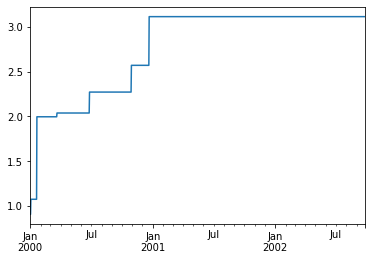

In [46]:
>>> kser.plot()

On a DataFrame, the <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.frame.DataFrame.plot.html#databricks.koalas.frame.DataFrame.plot">plot()</a> method is a convenience to plot all of the columns with labels:

In [47]:
>>> pdf = pd.DataFrame(np.random.randn(1000, 4), index=pser.index,
...                    columns=['A', 'B', 'C', 'D'])

In [48]:
>>> kdf = ks.from_pandas(pdf)

In [49]:
>>> kdf = kdf.cummax()

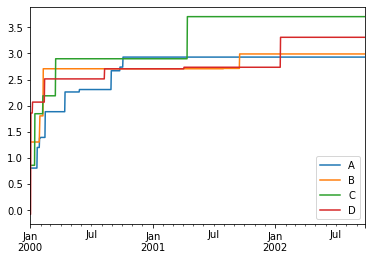

In [50]:
>>> kdf.plot()

## Getting data in/out
See the <a href="https://koalas.readthedocs.io/en/latest/reference/io.html">Input/Output
</a> docs.

### CSV

CSV is straightforward and easy to use. See <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.DataFrame.to_csv.html#databricks.koalas.DataFrame.to_csv">here</a> to write a CSV file and <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.read_csv.html#databricks.koalas.read_csv">here</a> to read a CSV file.

In [51]:
>>> kdf.to_csv('foo.csv')
>>> ks.read_csv('foo.csv').head(10)

,A,B,C,D
0,0.805018,1.304237,0.858088,-0.080529
1,0.805018,1.304237,0.858088,-0.080529
2,0.805018,1.304237,0.858088,1.859211
3,0.805018,1.304237,0.858088,1.859211
4,0.805018,1.304237,0.858088,1.859211
5,0.805018,1.304237,0.858088,1.859211
6,0.805018,1.304237,0.858088,1.859211
7,0.805018,1.304237,0.858088,2.068382
8,0.805018,1.304237,0.858088,2.068382
9,0.805018,1.304237,0.858088,2.068382


### Parquet

Parquet is an efficient and compact file format to read and write faster. See <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.DataFrame.to_parquet.html#databricks.koalas.DataFrame.to_parquet">here</a> to write a Parquet file and <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.read_parquet.html#databricks.koalas.read_parquet">here</a> to read a Parquet file.

In [52]:
>>> kdf.to_parquet('bar.parquet')
>>> ks.read_parquet('bar.parquet').head(10)

,A,B,C,D
0,0.805018,1.304237,0.858088,-0.080529
1,0.805018,1.304237,0.858088,-0.080529
2,0.805018,1.304237,0.858088,1.859211
3,0.805018,1.304237,0.858088,1.859211
4,0.805018,1.304237,0.858088,1.859211
5,0.805018,1.304237,0.858088,1.859211
6,0.805018,1.304237,0.858088,1.859211
7,0.805018,1.304237,0.858088,2.068382
8,0.805018,1.304237,0.858088,2.068382
9,0.805018,1.304237,0.858088,2.068382


### Spark IO

In addition, Koalas fully support Spark's various datasources such as ORC and an external datasource.  See <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.DataFrame.to_spark_io.html#databricks.koalas.DataFrame.to_spark_io">here</a> to write it to the specified datasource and <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.read_spark_io.html#databricks.koalas.read_spark_io">here</a> to read it from the datasource.

In [53]:
>>> kdf.to_spark_io('zoo.orc', format="orc")
>>> ks.read_spark_io('zoo.orc', format="orc").head(10)

,A,B,C,D
0,0.805018,1.304237,0.858088,-0.080529
1,0.805018,1.304237,0.858088,-0.080529
2,0.805018,1.304237,0.858088,1.859211
3,0.805018,1.304237,0.858088,1.859211
4,0.805018,1.304237,0.858088,1.859211
5,0.805018,1.304237,0.858088,1.859211
6,0.805018,1.304237,0.858088,1.859211
7,0.805018,1.304237,0.858088,2.068382
8,0.805018,1.304237,0.858088,2.068382
9,0.805018,1.304237,0.858088,2.068382
